In [59]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('classification.csv')

In [4]:
print data.head(),data.shape

   true  pred
0     1     0
1     1     1
2     1     1
3     0     0
4     1     1 (200, 2)


In [61]:
x=data[data.true==data.pred]
y=data[data.true!=data.pred]
mat=np.array([[len(x[x.true==1]),len(y[y.true==0])],[len(y[y.true==1]),len(x[x.true==0])]])
print 'TP',x[x.true==1].shape
print 'FP',y[y.true==0].shape
print 'FN',y[y.true==1].shape
print 'TN',x[x.true==0].shape
print mat

TP (43, 2)
FP (34, 2)
FN (59, 2)
TN (64, 2)
[[43 34]
 [59 64]]


In [67]:
print 'accuracy=',float(len(x))/len(data)
print 'precission=',float(mat[0,0])/(mat[0,0]+mat[0,1])
print 'recall=',float(mat[0,0])/(mat[0,0]+mat[1,0])
print 'Fscore=',2*(float(mat[0,0])/(mat[0,0]+mat[1,0])*float(mat[0,0]))/(mat[0,0]+mat[0,1])/(float(mat[0,0])/(mat[0,0]+mat[1,0])+float(mat[0,0])/(mat[0,0]+mat[0,1]))

accuracy= 0.535
precission= 0.558441558442
recall= 0.421568627451
Fscore= 0.480446927374


In [56]:
import sklearn.metrics as m

In [135]:
print 'accuracy=',round(m.accuracy_score(data.true,data.pred),2)
print 'precission=',round(m.precision_score(data.true,data.pred),2)
print 'recall=',round(m.recall_score(data.true,data.pred),2)
print 'Fscore=',round(m.f1_score(data.true,data.pred),2)

accuracy= 0.54
precission= 0.56
recall= 0.42
Fscore= 0.48


In [73]:
data2=pd.read_csv("scores.csv")
data2.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [80]:
pred=[data2.score_logreg,data2.score_svm,data2.score_knn,data2.score_tree]
print 'AUC_ROC'
for i,p in enumerate(pred):
    print i+1,m.roc_auc_score(data2.true,p)

AUC_ROC
1 0.71918767507
2 0.708683473389
3 0.635154061625
4 0.691926770708


In [82]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ewe\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


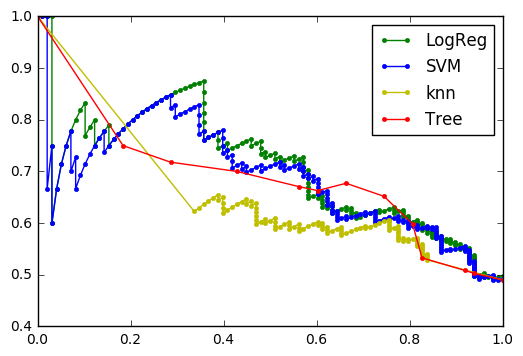

In [139]:
w=[]
for p in pred:
    w.append(m.precision_recall_curve(data2.true,p))
pylab.figure(0)
pylab.plot(w[0][1],w[0][0],c='g',marker='.',label='LogReg')
pylab.plot(w[1][1],w[1][0],c='b',marker='.',label='SVM')
pylab.plot(w[2][1],w[2][0],c='y',marker='.',label='knn')
pylab.plot(w[3][1],w[3][0],c='r',marker='.',label='Tree')
pylab.axis([0,1,0.4,1])
pylab.legend()

In [133]:
print 'Precision with condition of recall > 0.7'
for i,l in enumerate(w):
    print 'algo #',i+1,l[0][l[1]>0.7].max()

Precision with condition of recall > 0.7
algo # 1 0.63025210084
algo # 2 0.622807017544
algo # 3 0.606557377049
algo # 4 0.651785714286
